In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Dataset1.csv")
data = dataset.sort_values(['UNIXTime'], ascending = [True])
dataset

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12-01-2016 00:00,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12-01-2016 00:00,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12-01-2016 00:00,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12-01-2016 00:00,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [ ]:
dataset.head()

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset.describe()

In [3]:
from datetime import datetime
from pytz import timezone
import pytz
hawaii= timezone('Pacific/Honolulu')
dataset.index =  pd.to_datetime(dataset['UNIXTime'], unit='s')
dataset.index = dataset.index.tz_localize(pytz.utc).tz_convert(hawaii)
dataset['MonthOfYear'] = dataset.index.strftime('%m').astype(int)
dataset['DayOfYear'] = dataset.index.strftime('%j').astype(int)
dataset['WeekOfYear'] = dataset.index.strftime('%U').astype(int)
dataset['TimeOfDay(h)'] = dataset.index.hour
dataset['TimeOfDay(m)'] = dataset.index.hour*60 + dataset.index.minute
dataset['TimeOfDay(s)'] = dataset.index.hour*60*60 + dataset.index.minute*60 + dataset.index.second
# dataset['TimeSunRise'] = pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S')
# dataset['TimeSunSet'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S')
# dataset['DayLength(s)'] = dataset['TimeSunSet'].dt.hour*60*60 \
#                            + dataset['TimeSunSet'].dt.minute*60 \
#                            + dataset['TimeSunSet'].dt.second \
#                            - dataset['TimeSunRise'].dt.hour*60*60 \
#                            - dataset['TimeSunRise'].dt.minute*60 \
# #                            - dataset['TimeSunRise'].dt.second
# dataset.drop(['Data','Time','TimeSunRise','TimeSunSet'], inplace=True, axis=1)
dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,MonthOfYear,DayOfYear,WeekOfYear,TimeOfDay(h),TimeOfDay(m),TimeOfDay(s)
UNIXTime,,,,,,,,,,,,,,,,,
2016-09-29 23:55:26-10:00,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,273,39,23,1435,86126
2016-09-29 23:50:23-10:00,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,273,39,23,1430,85823
2016-09-29 23:45:26-10:00,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,273,39,23,1425,85526
2016-09-29 23:40:21-10:00,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,273,39,23,1420,85221
2016-09-29 23:35:24-10:00,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,273,39,23,1415,84924


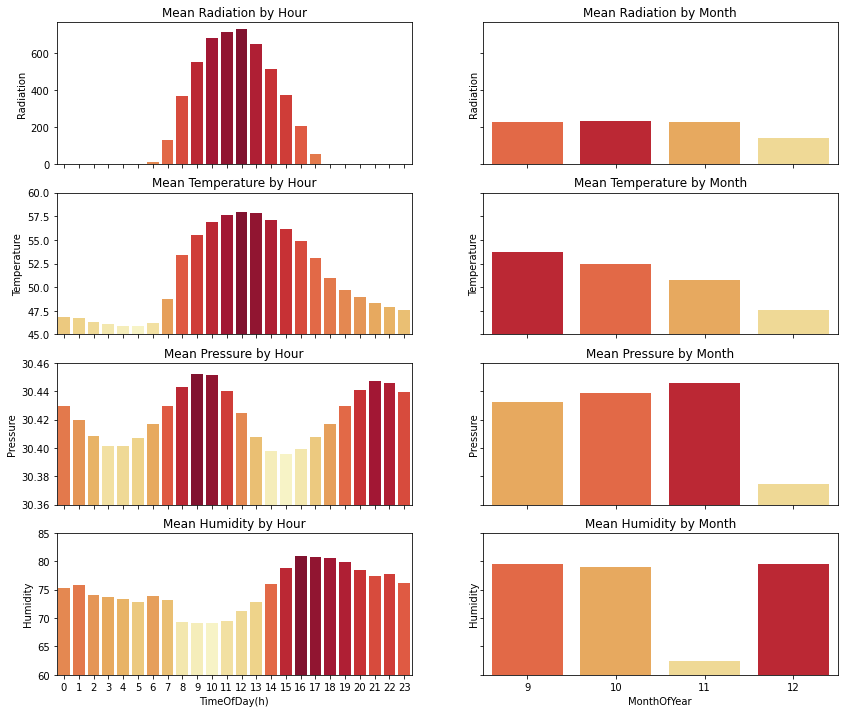

In [10]:
grouped_m=dataset.groupby('MonthOfYear').mean().reset_index()
grouped_w=dataset.groupby('WeekOfYear').mean().reset_index()
grouped_d=dataset.groupby('DayOfYear').mean().reset_index()
grouped_h=dataset.groupby('TimeOfDay(h)').mean().reset_index()

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharex='col', sharey='row', figsize=(14,12))
ax3.set_ylim(45,60)
ax5.set_ylim(30.36,30.46)
ax7.set_ylim(60,85)

ax1.set_title('Mean Radiation by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Radiation'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Radiation', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax1)
ax1.set_xlabel('')

ax2.set_title('Mean Radiation by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Radiation'].argsort().argsort() 
g = sns.barplot(x='MonthOfYear', y='Radiation', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax2)
ax2.set_xlabel('')

ax3.set_title('Mean Temperature by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Temperature'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Temperature', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax3)
ax3.set_xlabel('')

ax4.set_title('Mean Temperature by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Temperature'].argsort().argsort() 
g = sns.barplot(x='MonthOfYear', y='Temperature', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax4)
ax4.set_xlabel('')

ax5.set_title('Mean Pressure by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Pressure'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Pressure', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax5)
ax5.set_xlabel('')

ax6.set_title('Mean Pressure by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Pressure'].argsort().argsort() 
g = sns.barplot(x='MonthOfYear', y='Pressure', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax6)
ax6.set_xlabel('')

ax7.set_title('Mean Humidity by Hour')
pal = sns.color_palette("YlOrRd_r", len(grouped_h))
rank = grouped_h['Humidity'].argsort().argsort() 
g = sns.barplot(x="TimeOfDay(h)", y='Humidity', data=grouped_h, palette=np.array(pal[::-1])[rank], ax=ax7)

ax8.set_title('Mean Humidity by Month')
pal = sns.color_palette("YlOrRd_r", len(grouped_m))
rank = grouped_m['Humidity'].argsort().argsort() 
g = sns.barplot(x='MonthOfYear', y='Humidity', data=grouped_m, palette=np.array(pal[::-1])[rank], ax=ax8)

plt.show()

In [45]:
# sns.pairplot(dataset)

In [46]:
# sns.pairplot(dataset, hue= 'Radiation')

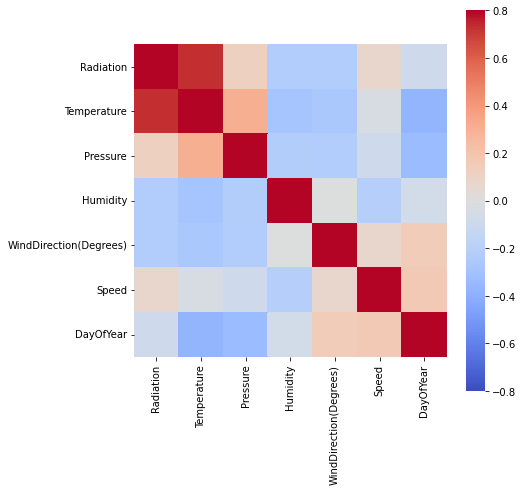

In [47]:
corrmat = dataset.drop(['TimeOfDay(h)', 'TimeOfDay(m)', 'TimeOfDay(s)', 'UNIXTime', 'MonthOfYear', 'WeekOfYear'], inplace=False, axis=1)
corrmat = corrmat.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmin=-.8, vmax=.8, square=True, cmap = 'coolwarm')
plt.show()

In [4]:
X = dataset[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'DayOfYear', 'TimeOfDay(s)']]
y = dataset['Radiation']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
import numpy as np
np.random.seed(1337)

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers
from keras.utils import np_utils


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

batch_size = 10
nb_classes = 1
nb_epoch = 10

dataPath = "Dataset1.csv"

def NeuralNetwork(X_train,Y_train,X_test,Y_test):

# applying the principal component analysis to reduce the number of features
    pca = PCA(n_components=7)
    X_train[np.isnan(X_train)] = 0
    pca.fit(X_train)
    X_train = pca.transform(X_train)

    X_test[np.isnan(X_test)] = 0
    pca.fit(X_test)
    X_test = pca.transform(X_test)	

# normalizing the input values to fall in -1 to 1
    X_train = X_train/180000000.0
    X_test = X_test/180000000.0


    model = Sequential()
    model.add(Dense(15, input_shape=(7,)))
    model.add(Activation('tanh'))

    model.add(Dense(11))
    model.add(Activation('tanh'))

    model.add(Dense(1))

    model.summary()
    # sgd = keras.optimizers.SGD(lr=0.1,momentum=0.2)
    model.compile(loss='mean_absolute_error',
                  optimizer="adamax",
                  metrics=['accuracy'])

    history = model.fit(X_train, Y_train,
                        batch_size=batch_size, epochs=nb_epoch,
                        verbose=1, validation_data=(X_test, Y_test))


    score = model.evaluate(X_test, Y_test, verbose=0)
    error = score[0]

    return error

def main():

    errorList = []

 # for data in each of the segment
    for i in range(0,4):
        data = np.genfromtxt(dataPath,delimiter=',',skip_header=0,dtype=float)
#data = np.load(dataPath, allow_pickle=True)
        X_train = data[:,:10]
        Y_train = data[:,10]

        data = np.genfromtxt(dataPath, delimiter=',',skip_header=0,dtype=float)
#data = np.loadtxt(dataPath, allow_pickle=True)
        X_test = data[:,:10]
        Y_test = data[:,10]

#train and test nueral network for this segment
        error = NeuralNetwork(X_train,Y_train,X_test,Y_test)
        errorList.append(error)	
        
        
#compute the mean error from all the segments
    print(errorList)
    meanerror = 0.0
    for i in errorList:
        meanerror += i
    meanerror /= 4
    print(meanerror)

if __name__ == "__main__":
    main()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                120       
                                                                 
 activation (Activation)     (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 11)                176       
                                                                 
 activation_1 (Activation)   (None, 11)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 308
Trainable params: 308
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3269/3269 [==============================] - 20

 activation_7 (Activation)   (None, 11)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
Total params: 308
Trainable params: 308
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
3269/3269 [==============================] - 14s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
3269/3269 [==============================] - 13s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
3269/3269 [==============================] - 13s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
3269/3269 [==============================] - 13s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
3269/32

In [ ]:
print(type(dataset['UNIXTime']))

In [8]:
score

NameError: name 'score' is not defined